# **Machine Learning para Business Intelligence** 
#### Profesor: Lucas Gómez Tobón

## 8. Análisis No Supervisado

### Análisis de Componentes Principales (PCA)

Haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:
   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 

Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones por pares entre las variables para considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cargamos y visualizamos la primeras observaciones de los datos
lugares = pd.read_csv('../Data/lugares.csv')
lugares = lugares.set_index("Ciudad")
lugares.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


In [2]:
lugares.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, Abilene,TX to Yuba-City,CA
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Clima y Terreno                          329 non-null    int64
 1   Alojamiento                              329 non-null    int64
 2   Cuidado de la salud y el medio ambiente  329 non-null    int64
 3   Crimen                                   329 non-null    int64
 4   Transporte                               329 non-null    int64
 5   Educación                                329 non-null    int64
 6   Artes                                    329 non-null    int64
 7   Recreación                               329 non-null    int64
 8   Economía                                 329 non-null    int64
dtypes: int64(9)
memory usage: 25.7+ KB


In [3]:
lugares.describe()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,538.732523,8346.559271,1185.738602,961.054711,4210.082067,2814.887538,3150.884498,1845.957447,5525.364742
std,120.808259,2385.262622,1003.002036,357.154186,1451.179240,320.792953,4642.283738,807.888171,1084.468523
min,105.000000,5159.000000,43.000000,308.000000,1145.000000,1701.000000,52.000000,300.000000,3045.000000
25%,480.000000,6760.000000,583.000000,707.000000,3141.000000,2619.000000,778.000000,1316.000000,4842.000000
50%,542.000000,7877.000000,833.000000,947.000000,4080.000000,2794.000000,1871.000000,1670.000000,5384.000000
75%,592.000000,9015.000000,1445.000000,1156.000000,5205.000000,3012.000000,3844.000000,2176.000000,6113.000000
max,910.000000,23640.000000,7850.000000,2498.000000,8625.000000,3781.000000,56745.000000,4800.000000,9980.000000


<AxesSubplot:>

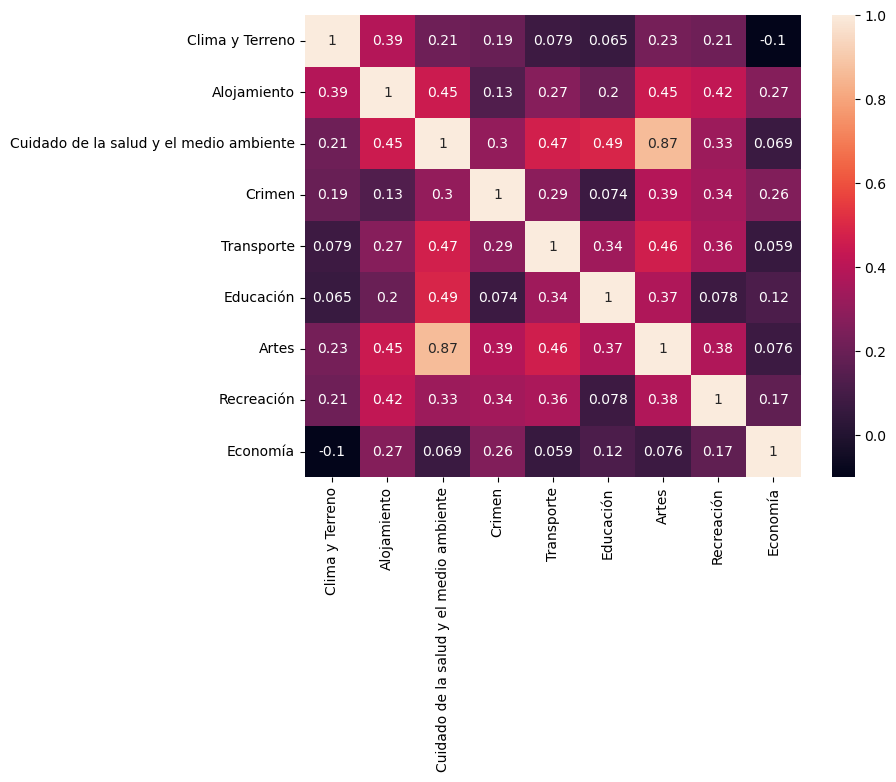

In [8]:
# Genera matriz de correlación
corr = lugares.corr()
# Define tamaño de la figura
plt.figure(figsize = (8,6))
# Mapa de calor para ver las correlaciones
sns.heatmap(corr, annot = True)

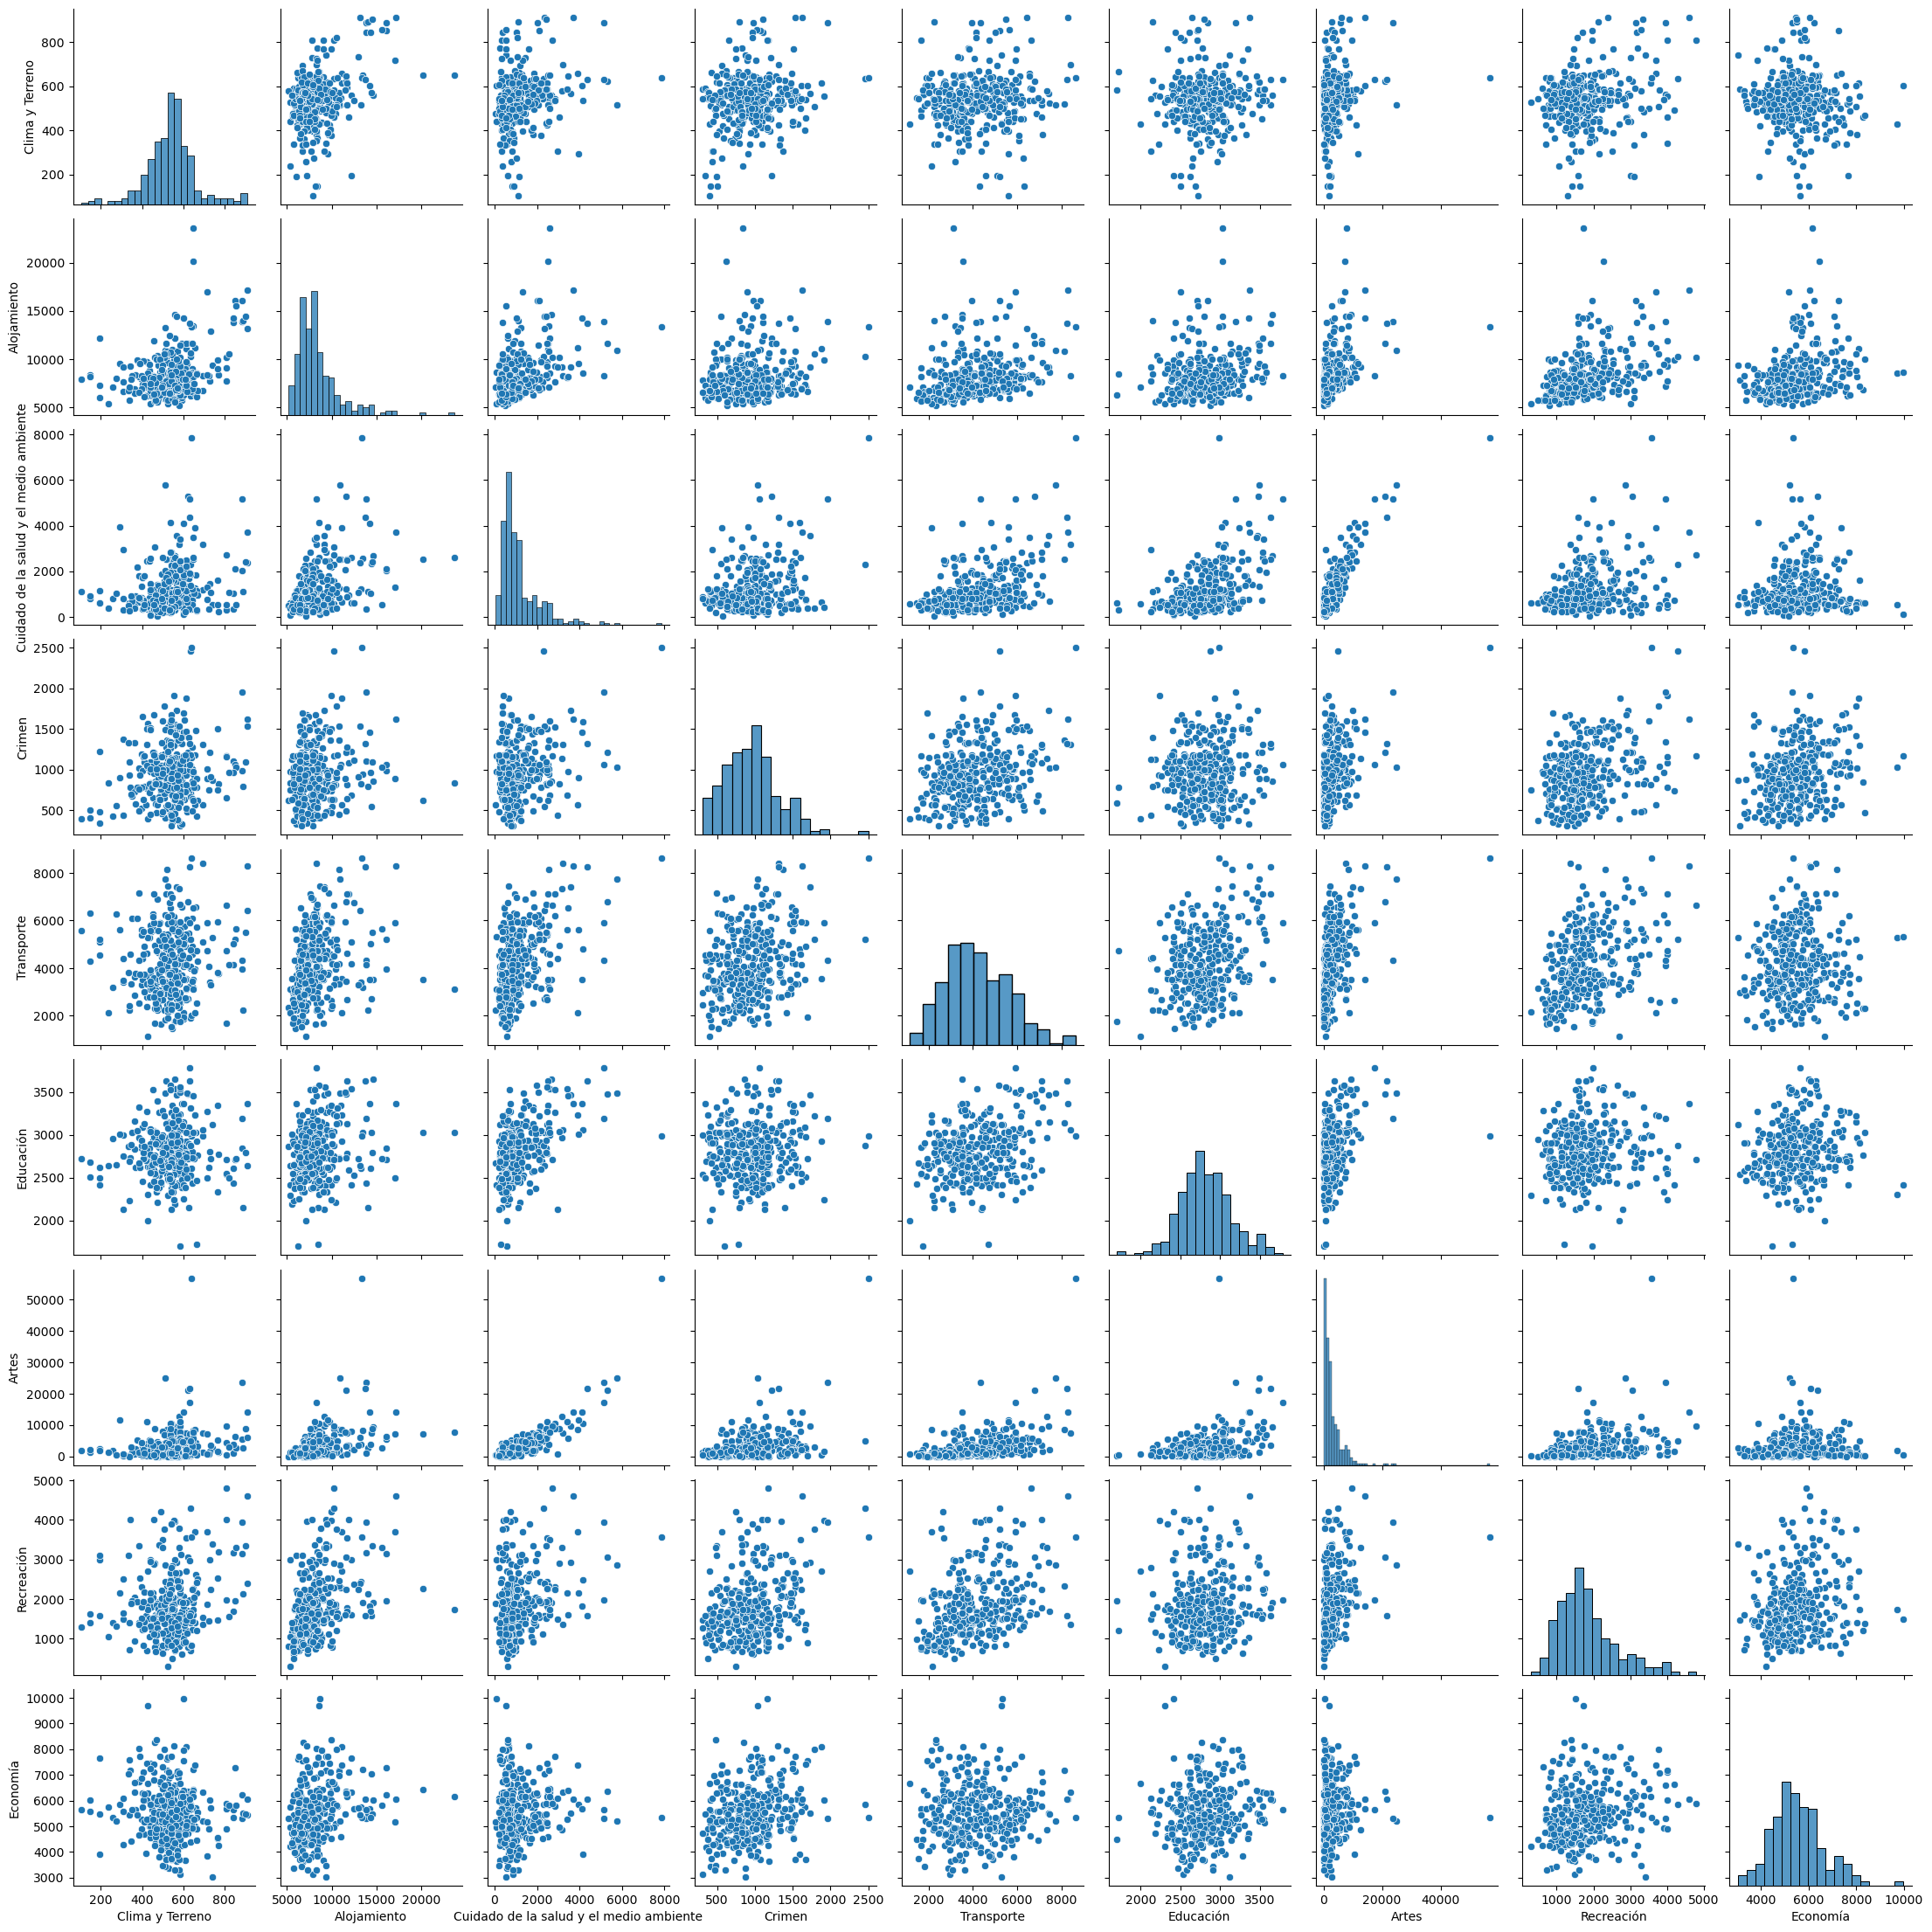

In [9]:
sns.pairplot(lugares)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lugares2 = scaler.fit_transform(lugares)
lugares2 = pd.DataFrame(lugares2, columns = lugares.columns)
lugares2.describe().round(2)

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
count,329.00,329.00,329.00,329.00,329.00,329.00,329.00,329.00,329.00
mean,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.60,-1.34,-1.14,-1.83,-2.12,-3.48,-0.67,-1.92,-2.29
25%,-0.49,-0.67,-0.60,-0.71,-0.74,-0.61,-0.51,-0.66,-0.63
50%,0.03,-0.20,-0.35,-0.04,-0.09,-0.07,-0.28,-0.22,-0.13
75%,0.44,0.28,0.26,0.55,0.69,0.62,0.15,0.41,0.54
max,3.08,6.42,6.65,4.31,3.05,3.02,11.56,3.66,4.11


In [17]:
lugares2.shape

(329, 9)

In [33]:
from sklearn.decomposition import PCA

modelo = PCA()
modelo.fit(lugares2)
resultados = pd.DataFrame({"Componente": range(1, 10), 
                           "Varianza explicada": modelo.explained_variance_})
resultados["Porcentaje de varianza explicada"]  = resultados["Varianza explicada"]/resultados["Varianza explicada"].sum()
resultados["Varianza acumulada"]  = resultados["Varianza explicada"].cumsum()
resultados["Porcentaje acumulado de varianza explicada"]  = resultados["Varianza acumulada"]/resultados["Varianza explicada"].sum()
resultados

,Componente,Varianza explicada,Porcentaje de varianza explicada,Varianza acumulada,Porcentaje acumulado de varianza explicada
0,1,3.418683,0.378699,3.418683,0.378699
1,2,1.217677,0.134886,4.636360,0.513585
2,3,1.144959,0.126831,5.781320,0.640416
3,4,0.923725,0.102324,6.705045,0.742741
4,5,0.755581,0.083698,7.460626,0.826439
5,6,0.632484,0.070062,8.093111,0.896501
6,7,0.494551,0.054783,8.587662,0.951284
7,8,0.319008,0.035338,8.906670,0.986622
8,9,0.120769,0.013378,9.027439,1.000000


<AxesSubplot:xlabel='Componente', ylabel='Porcentaje acumulado de varianza explicada'>

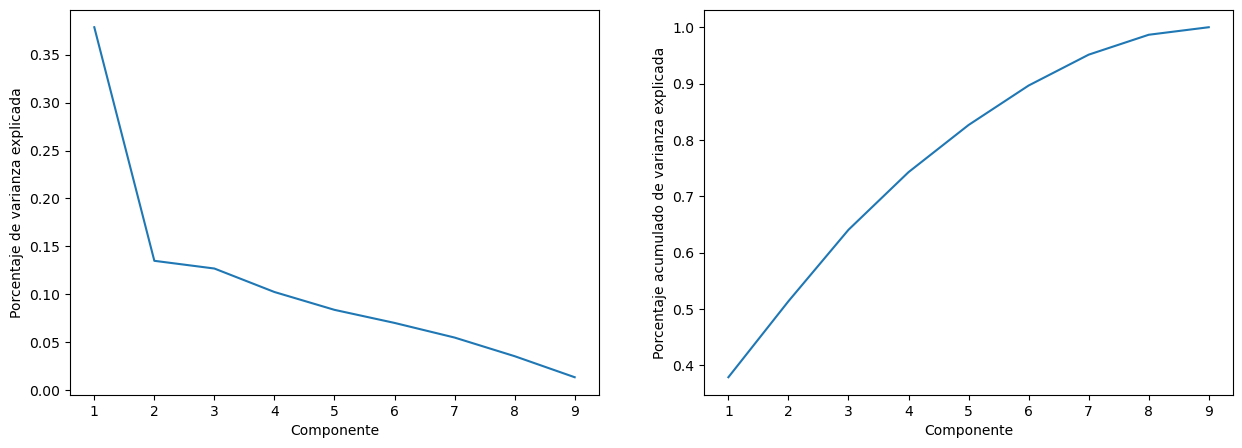

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.lineplot(data = resultados, x = "Componente", y = "Porcentaje de varianza explicada", ax = ax[0])
sns.lineplot(data = resultados, x = "Componente", y = "Porcentaje acumulado de varianza explicada", ax = ax[1])

In [44]:
cp = pd.DataFrame(modelo.components_, columns = lugares2.columns, index = ["C"+  str(i) for i in range(1, 10)])
cp

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
C1,0.206414,0.356522,0.460215,0.281298,0.351151,0.275293,0.463054,0.327888,0.135412
C2,0.217835,0.250624,-0.299465,0.355342,-0.179604,-0.483382,-0.194790,0.384475,0.471283
C3,0.689956,0.208172,0.007325,-0.185105,-0.146376,-0.229703,0.026484,0.050853,-0.607314
C4,0.137321,0.511829,0.014702,-0.539050,-0.302904,0.335411,-0.101080,-0.189801,0.421770
C5,-0.369150,0.233488,-0.103241,-0.523940,0.404348,-0.208819,-0.105098,0.529541,-0.159620
C6,-0.374605,0.141640,0.373848,-0.080923,-0.467592,-0.502170,0.461881,-0.089916,-0.032608
C7,-0.084706,-0.230639,0.013868,0.018606,-0.583391,0.426182,-0.021525,0.627878,-0.149741
C8,-0.362308,0.613855,-0.185676,0.430025,-0.093599,0.188668,-0.203990,-0.150596,-0.404809
C9,0.001391,0.013600,-0.716355,-0.058608,0.003629,0.110840,0.685758,-0.025506,0.000438


In [72]:
np.sqrt(modelo.explained_variance_[0:2])

array([1.84896807, 1.10348417])

In [75]:
# Correlaciones entre los Componentes y las Variables
loadings = cp.T * np.sqrt(modelo.explained_variance_)
loadings[["C1", "C2"]]

,C1,C2
Clima y Terreno,0.381653,0.240378
Alojamiento,0.659197,0.276560
Cuidado de la salud y el medio ambiente,0.850922,-0.330455
Crimen,0.520112,0.392115
Transporte,0.649267,-0.198191
Educación,0.509007,-0.533404
Artes,0.856173,-0.214948
Recreación,0.606254,0.424262
Economía,0.250373,0.520054


In [51]:
ciudades = lugares.index

In [55]:
lugares_cp = pd.DataFrame(modelo.transform(lugares2))
lugares_cp["ciudades"] = ciudades
lugares_cp = lugares_cp[["ciudades", 0, 1]]

Text(0, 0.5, 'Componente Principal 2')

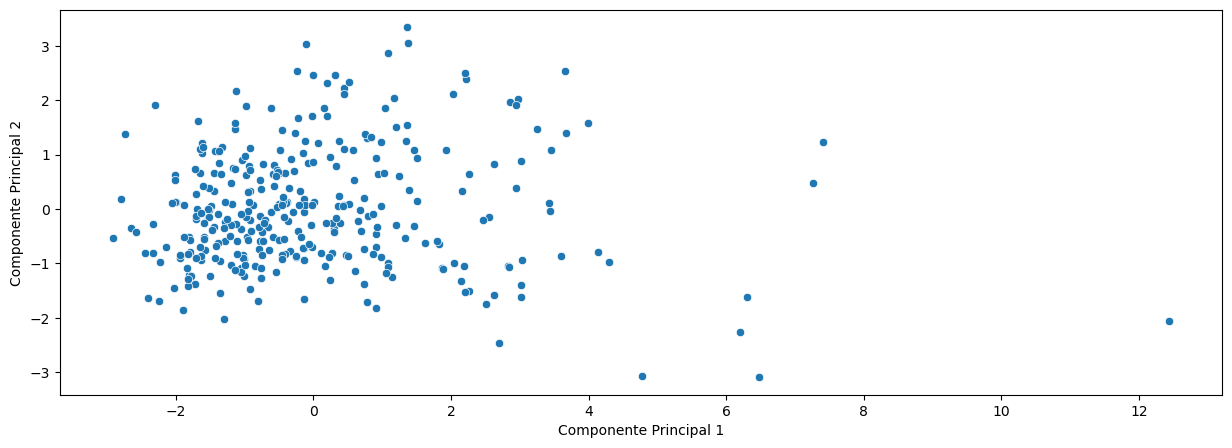

In [58]:
fig, ax = plt.subplots(figsize = (15,5))
sns.scatterplot(data = lugares_cp, x = 0, y = 1)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

In [62]:
outliers = lugares_cp.loc[lugares_cp[0] > 6, "ciudades"].values

In [64]:
lugares.loc[outliers,]

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Boston,MA",623,11609,5301,1215,6801,3479,21042,3066,6363
"Chicago,IL",514,10913,5766,1034,7742,3486,24846,2856,5205
"Los-Angeles,Long-Beach,CA",885,13868,5153,1960,4345,3195,23567,3948,5316
"New-York,NY",638,13358,7850,2498,8625,2984,56745,3579,5338
"San-Francisco,CA",910,17158,3726,1619,8299,3371,14226,4600,6063
"Washington,DC-MD-VA",631,13724,4361,1317,8236,3635,21701,1578,6072


C:\Users\Lucas\AppData\Local\Temp\ipykernel_1248\1271518289.py:5: DeprecationWarning: This function is deprecated. Please call randint(10, 75 + 1) instead
  plt.text(x = valor + 50, y = np.random.random_integers(10, 75),


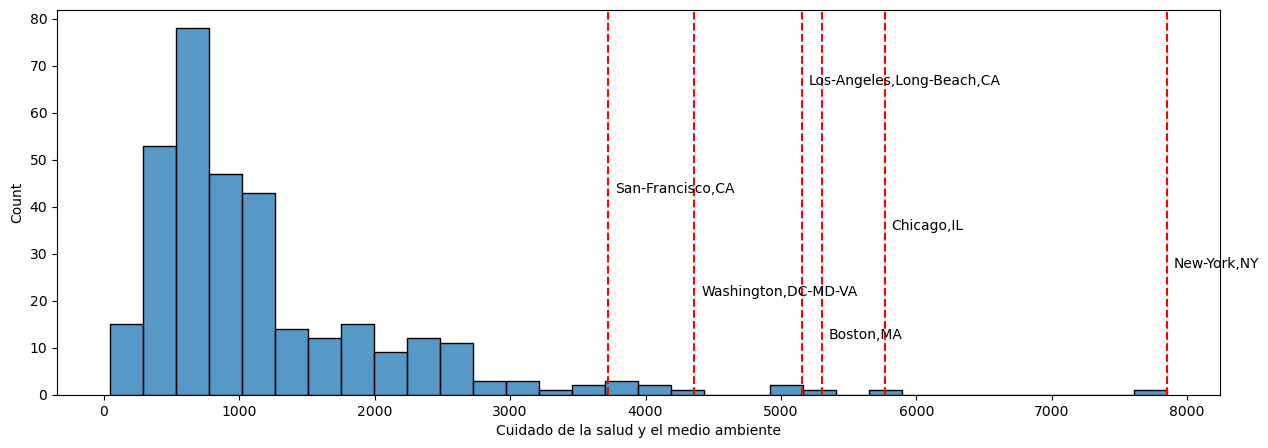

In [125]:
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(data = lugares, x = "Cuidado de la salud y el medio ambiente", ax = ax)
for ciudad, valor in lugares.loc[outliers, "Cuidado de la salud y el medio ambiente"].items():
    plt.axvline(x = valor, color = 'red', linestyle = "--")
    plt.text(x = valor + 50, y = np.random.random_integers(10, 75), 
             s = ciudad)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_1248\925596311.py:5: DeprecationWarning: This function is deprecated. Please call randint(10, 90 + 1) instead
  plt.text(x = valor + 50, y = np.random.random_integers(10, 90),


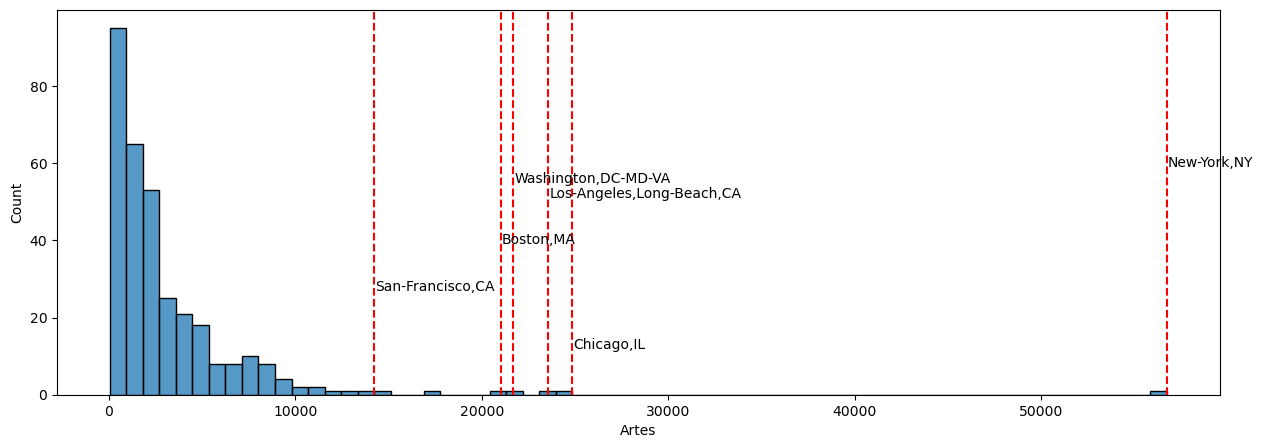

In [127]:
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(data = lugares, x = "Artes", ax = ax)
for ciudad, valor in lugares.loc[outliers, "Artes"].items():
    plt.axvline(x = valor, color = 'red', linestyle = "--")
    plt.text(x = valor + 50, y = np.random.random_integers(10, 90), 
             s = ciudad)

In [134]:
lugares["outliers"] = False
lugares.loc[outliers, "outliers"] = True

<AxesSubplot:xlabel='Cuidado de la salud y el medio ambiente', ylabel='Artes'>

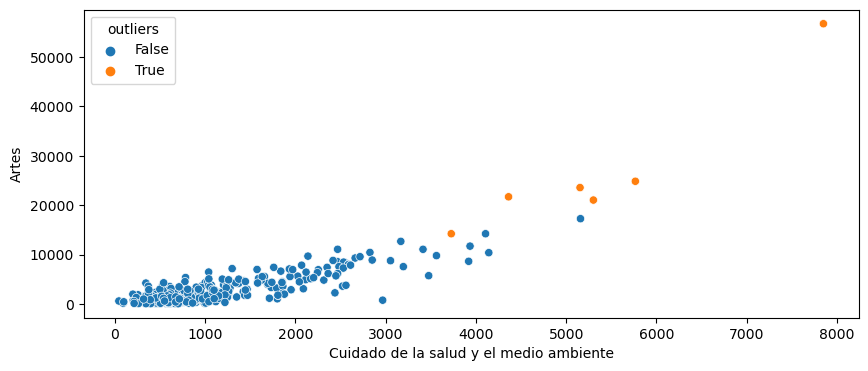

In [135]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.scatterplot(data = lugares, x = "Cuidado de la salud y el medio ambiente", y = "Artes", hue = "outliers", ax = ax)